<a href="https://colab.research.google.com/github/SarkarPriyanshu/Machine-Learning-Models/blob/main/CustomerChurnUsingANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from google.colab import drive


from sklearn.preprocessing import PowerTransformer


import warnings
warnings.filterwarnings('ignore')

#### DataSet (link:https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction)

In [2]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Churn_Modelling.csv')

In [4]:
df.shape

(10000, 14)

In [5]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6025,6026,15709917,Ni,601,France,Female,46,3,98202.76,1,0,0,137763.93,0
1800,1801,15794122,Otutodilinna,713,France,Female,59,3,0.00,2,1,1,62700.08,0
192,193,15756850,Golovanov,479,France,Male,40,1,0.00,2,0,0,114996.43,0
7028,7029,15618410,Murray,718,Germany,Male,26,7,147527.03,1,0,0,51099.56,0
126,127,15671137,MacDonald,549,France,Female,52,1,0.00,1,0,1,8636.05,1


In [6]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


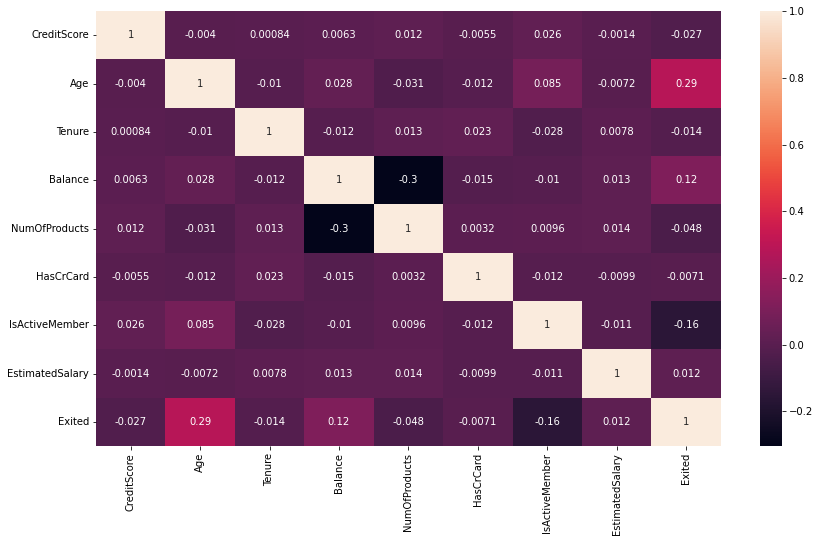

In [8]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show()

### EDA

#### Univariant Analysis

In [9]:
numericFeatures = list()
categoricalFeatures = list()
target = None

for feature in df.columns:
  if (df[feature].dtype == 'int64' or df[feature].dtype == 'float64') and feature != 'Exited':
    numericFeatures.append(feature)
  elif  df[feature].dtype == 'object':
    categoricalFeatures.append(feature)
  else:
    target = feature
print(f'target : {target}\nNumeric : {numericFeatures}\ncategorical : {categoricalFeatures}')

target : Exited
Numeric : ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical : ['Geography', 'Gender']


### Univarient numerica features

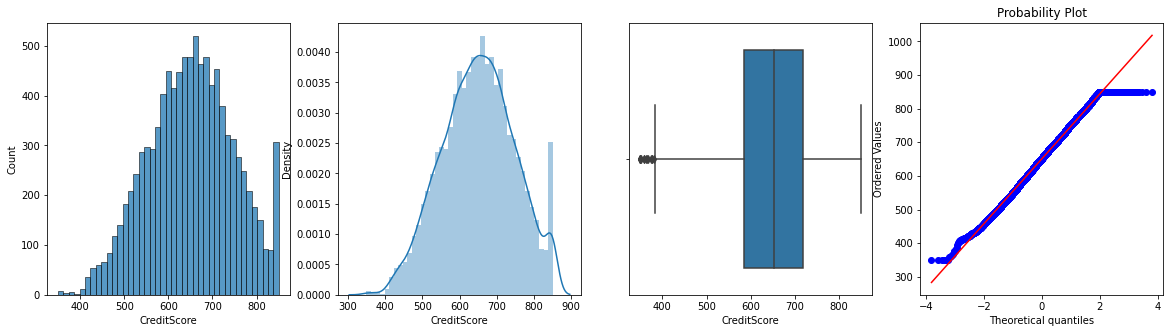

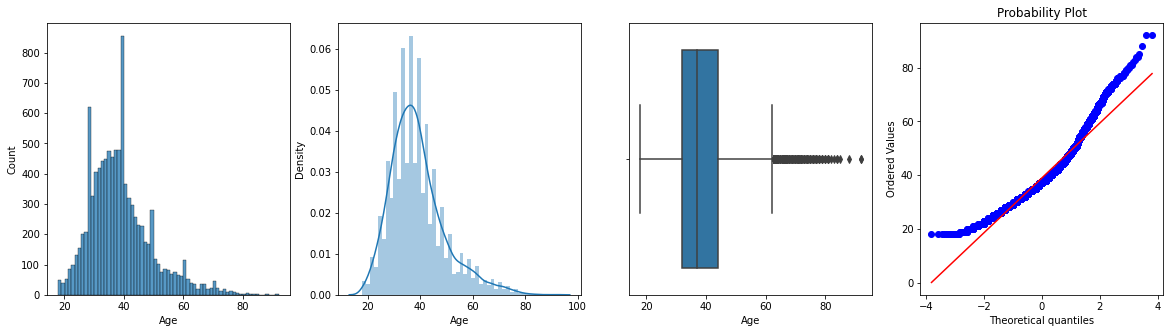

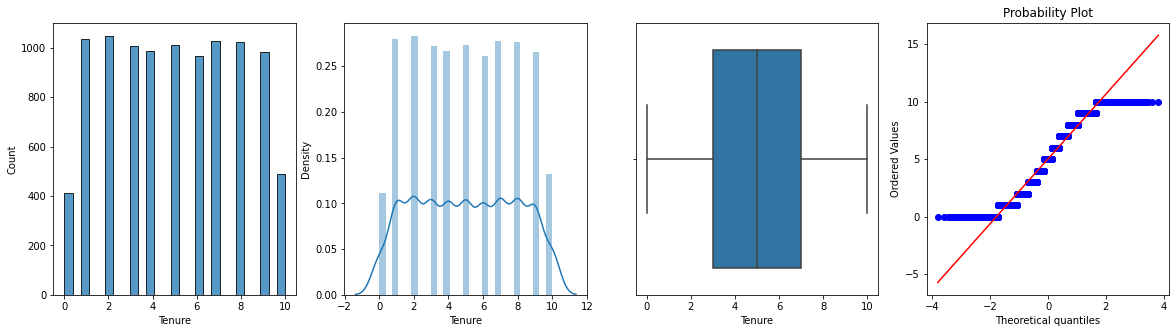

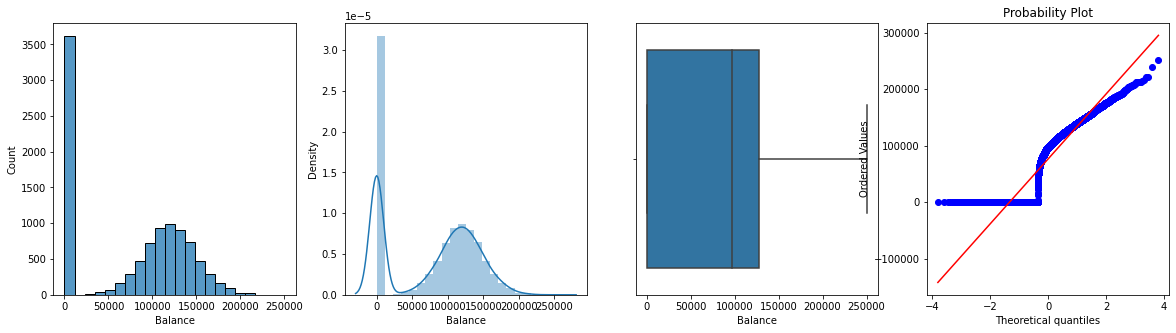

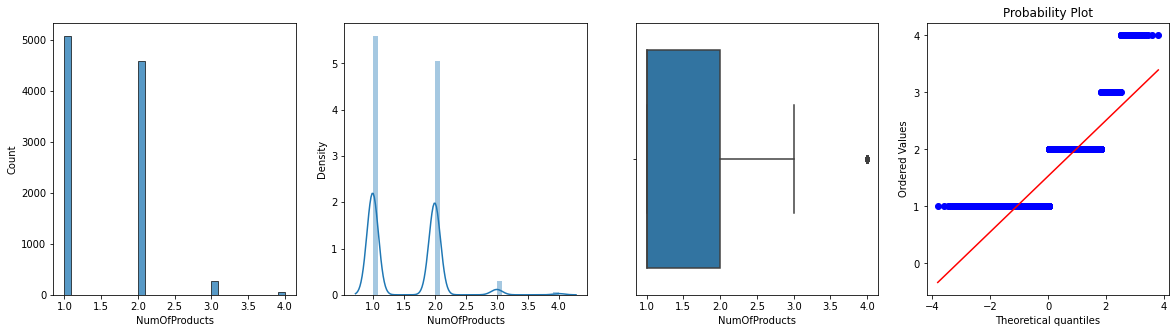

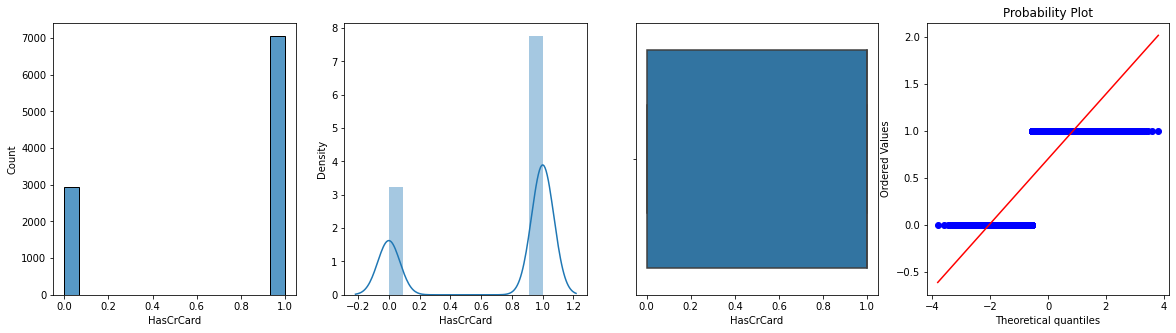

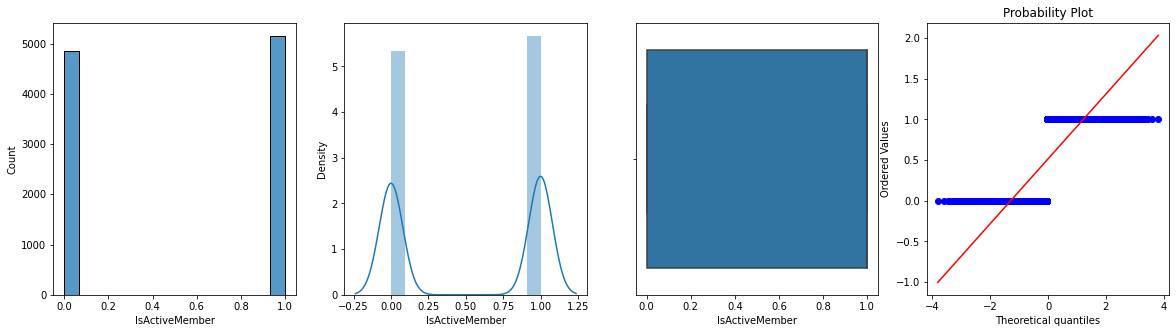

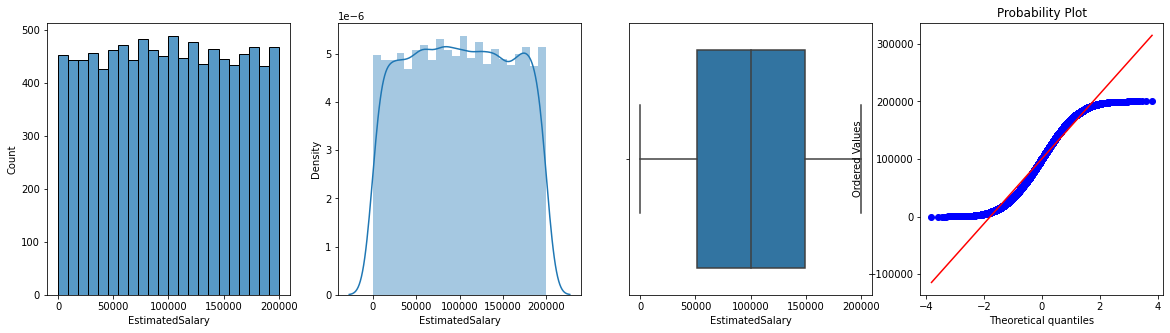

In [10]:
for feature in numericFeatures:
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot(df[feature], ax=ax[0])
  sns.distplot(df[feature], ax=ax[1])
  sns.boxplot(df[feature],ax=ax[2])
  stats.probplot(df[feature], plot=ax[3], fit=True)
  fig.show()

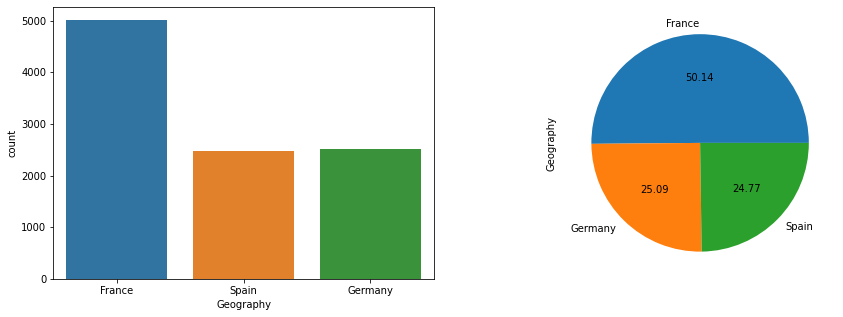

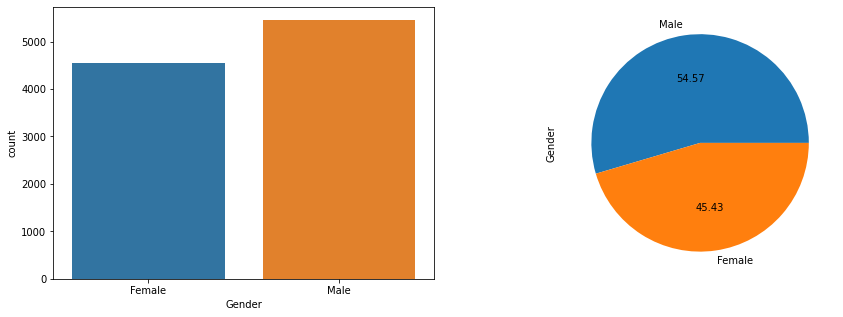

In [11]:
for feature in categoricalFeatures:
  fig, ax = plt.subplots(1,2,figsize=(15, 5))
  sns.countplot(df[feature], ax=ax[0])
  df[feature].value_counts().plot(kind='pie',autopct='%.2f')
  fig.show()

<AxesSubplot:xlabel='Exited', ylabel='count'>

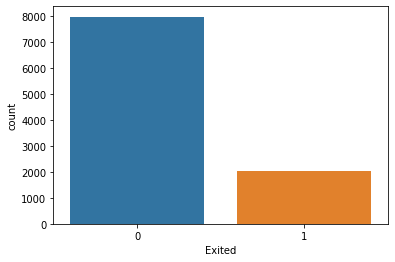

In [12]:
sns.countplot(df[target])

#### Bivariant Analysis

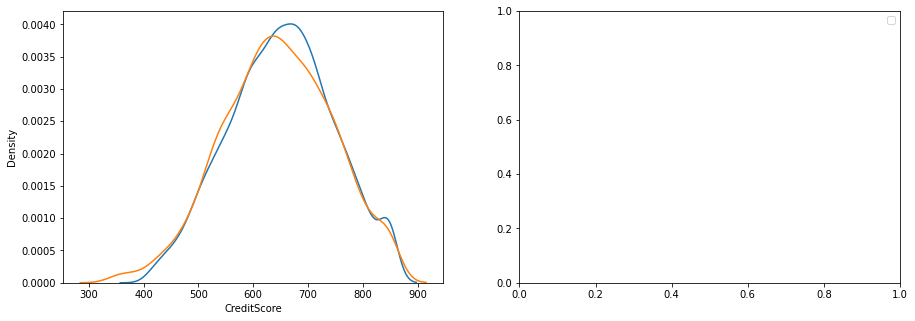

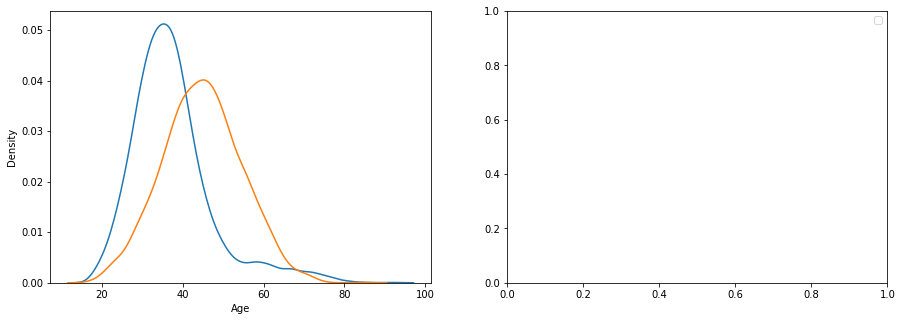

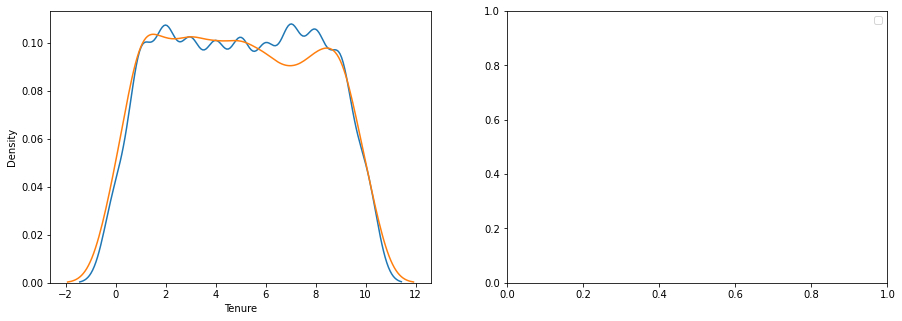

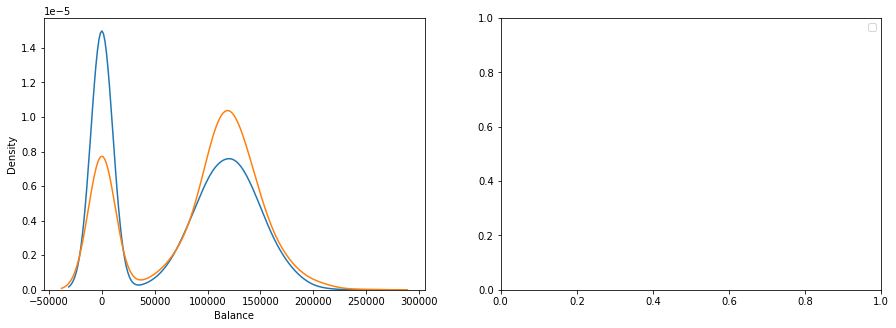

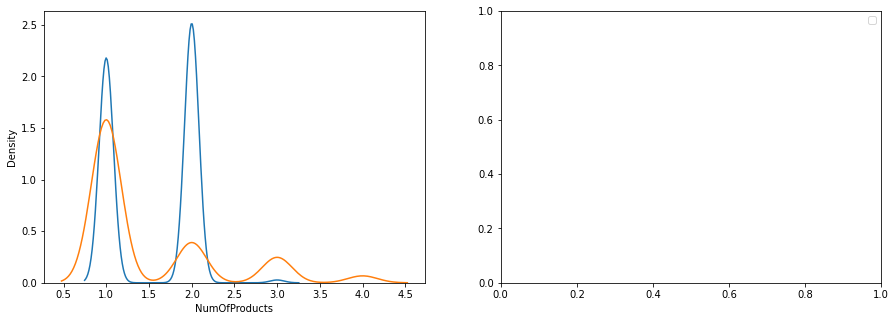

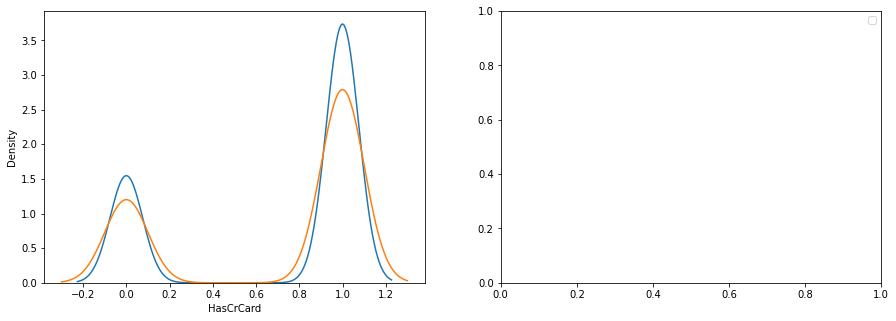

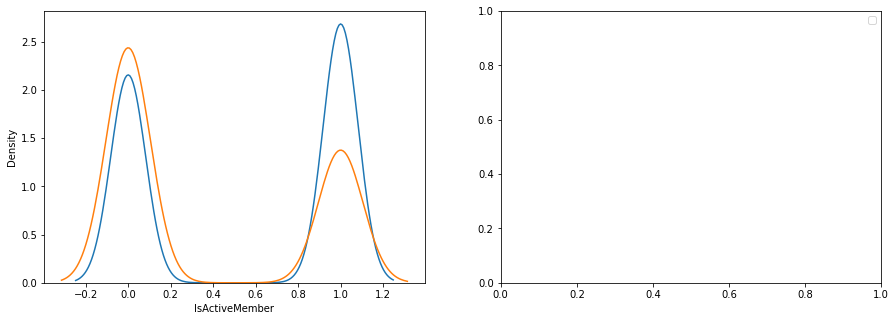

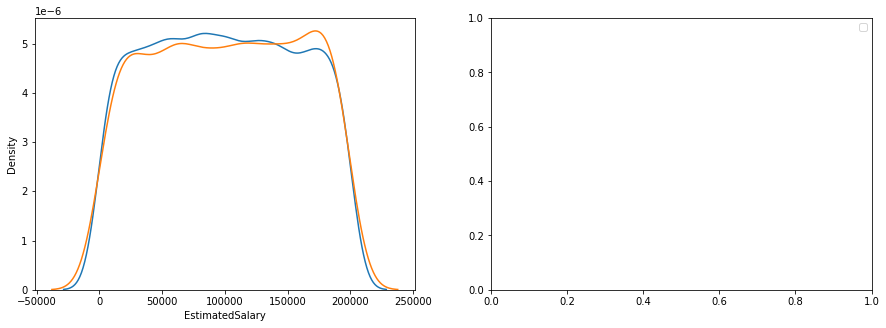

In [13]:
for feature in numericFeatures:
  fig, ax = plt.subplots(1,2,figsize=(15, 5))


  sns.distplot(df[df[target]==0][feature],hist=False, ax=ax[0])
  sns.distplot(df[df[target]==1][feature],hist=False, ax=ax[0])
  plt.legend(labels=["Exites No","Exites Yes"])

  plt.show()
  

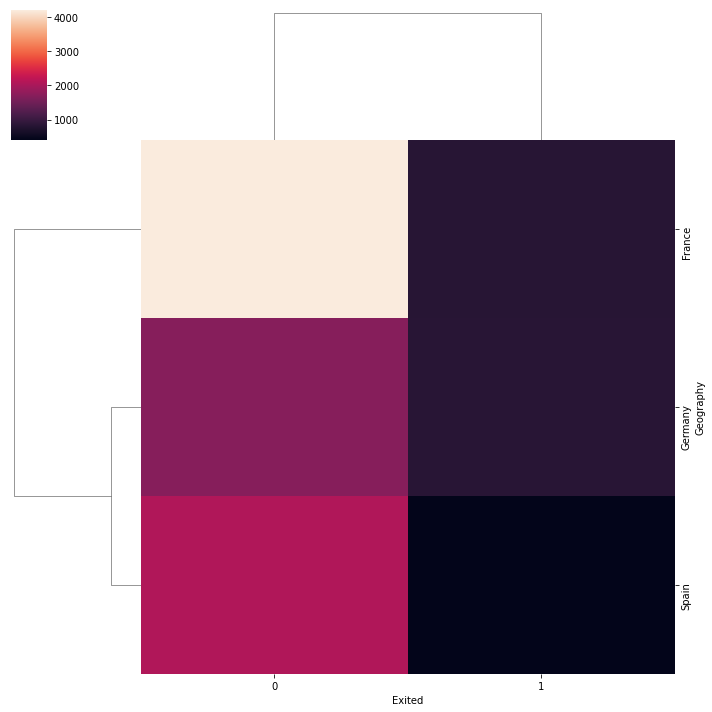

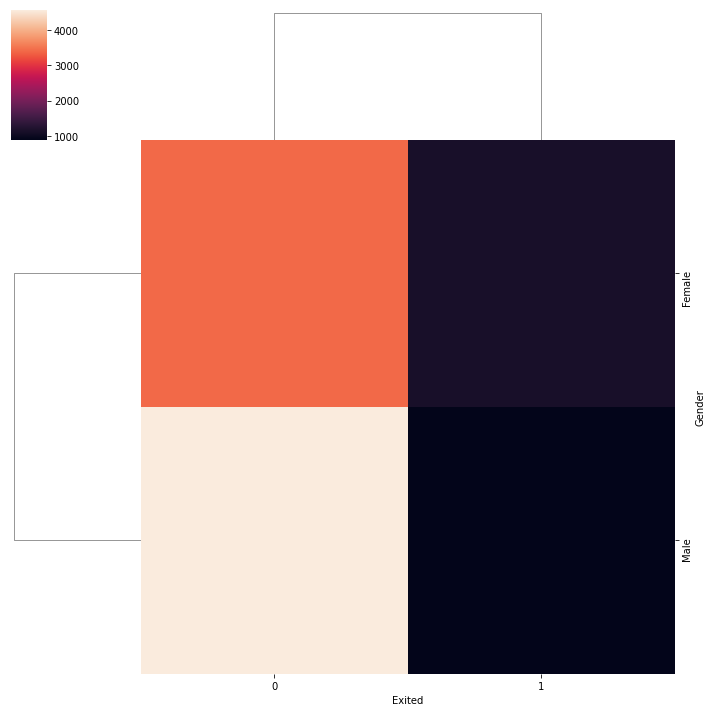

In [14]:
for feature in categoricalFeatures:
  sns.clustermap(pd.crosstab(df[feature],df[target]),)

9341.860156575658 56.046257865906725 Exponantial variance
9341.860156575658 3.6722850015144113 Square root variance
9341.860156575658 49635.438758740114 yojohnson variance
109.99408416841683 4.044095960109924 Exponantial variance
109.99408416841683 0.6599938628177939 Square root variance
109.99408416841683 0.009552194332417212 yojohnson variance
8.364672627262726 1.5179890534012328 Exponantial variance
8.364672627262726 0.6049926915084689 Square root variance
8.364672627262726 3.551839401398896 yojohnson variance
3893436175.990742 1453452.9796884053 Exponantial variance
3893436175.990742 28489.654385930084 Square root variance
3893436175.990742 218.26645924977666 yojohnson variance
0.33832179217921793 0.10872836877493923 Exponantial variance
0.33832179217921793 0.05252496293263161 Square root variance
0.33832179217921793 0.005272111211612143 yojohnson variance
0.20779052905290527 0.20776974999999998 Exponantial variance
0.20779052905290527 0.20776974999999998 Square root variance
0.207

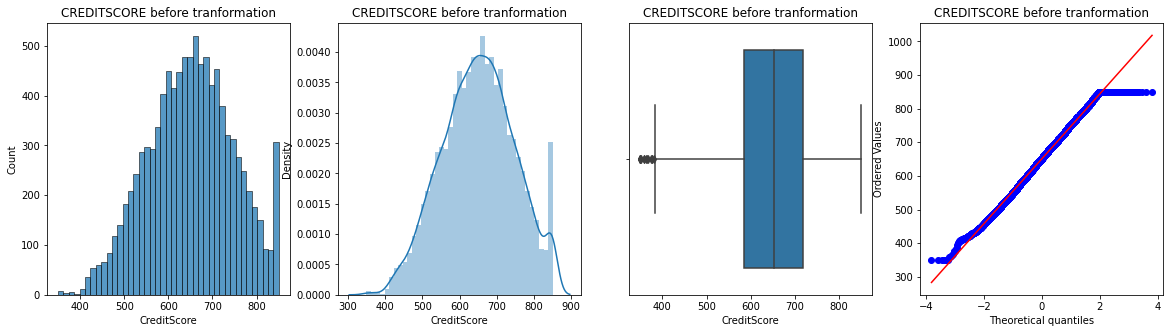

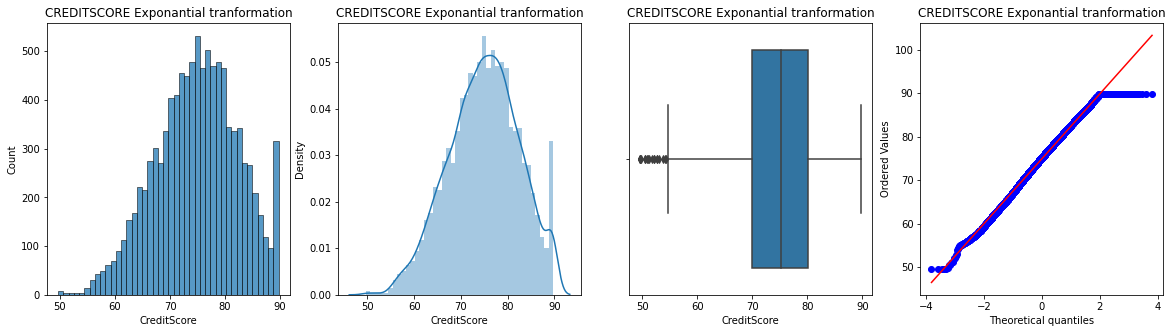

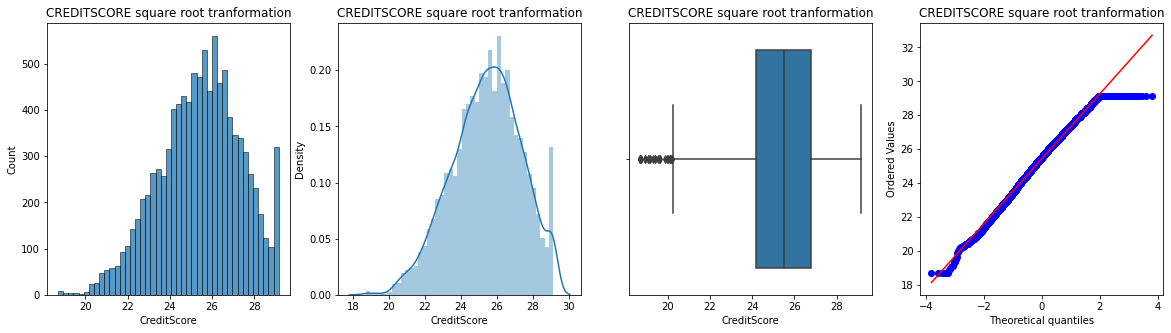

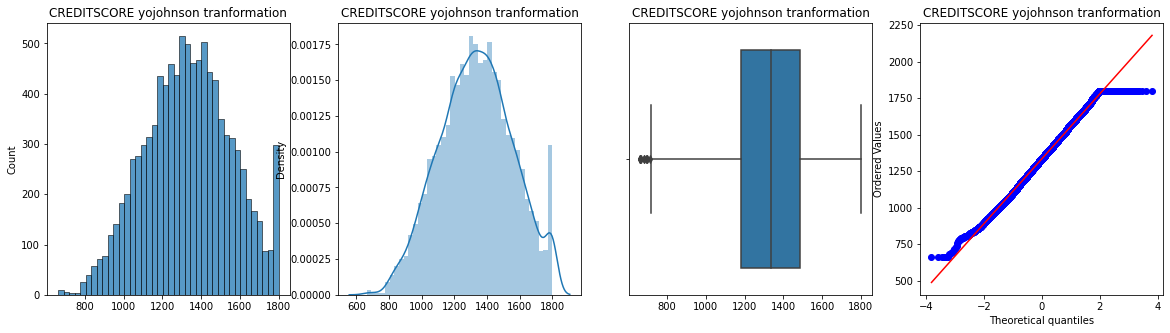

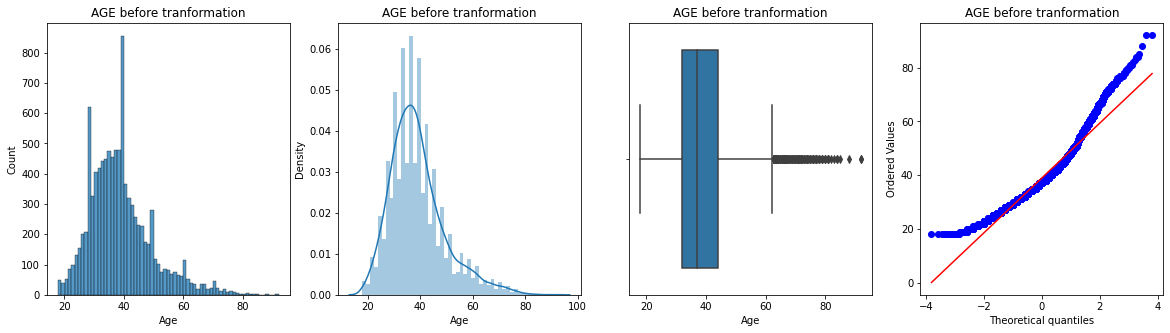

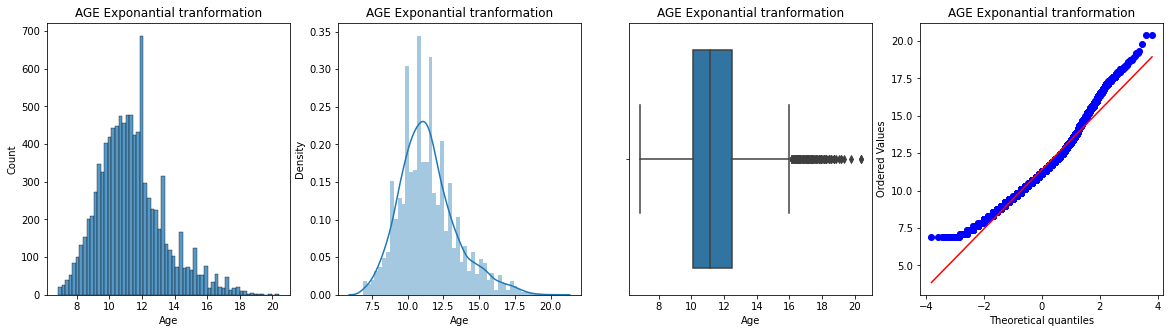

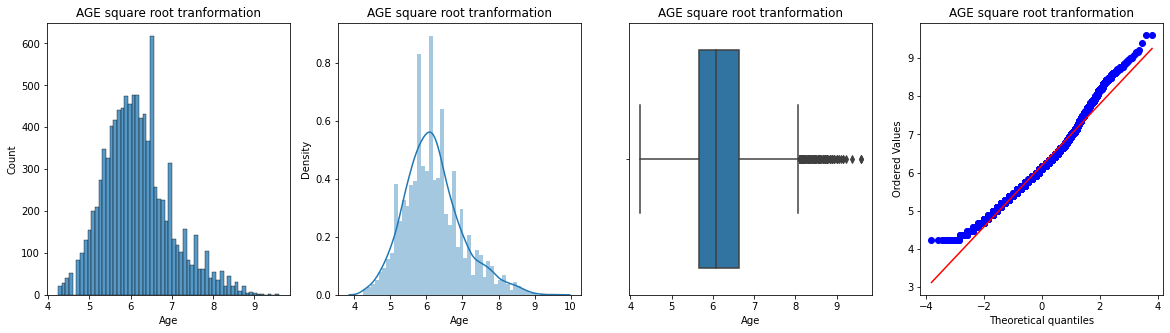

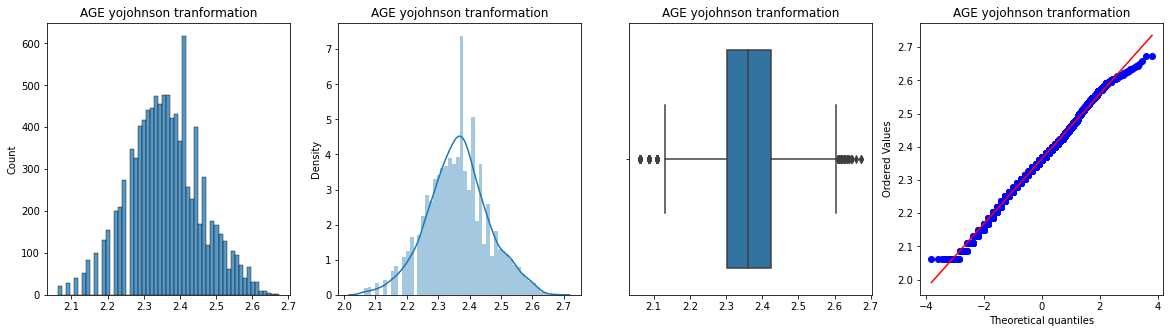

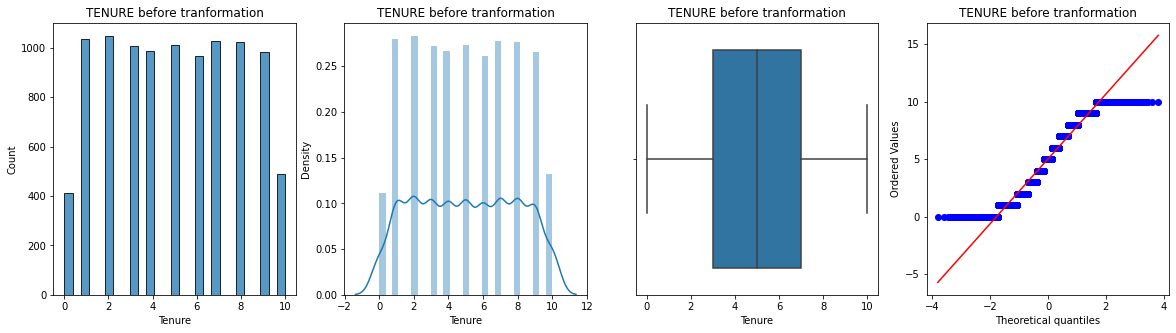

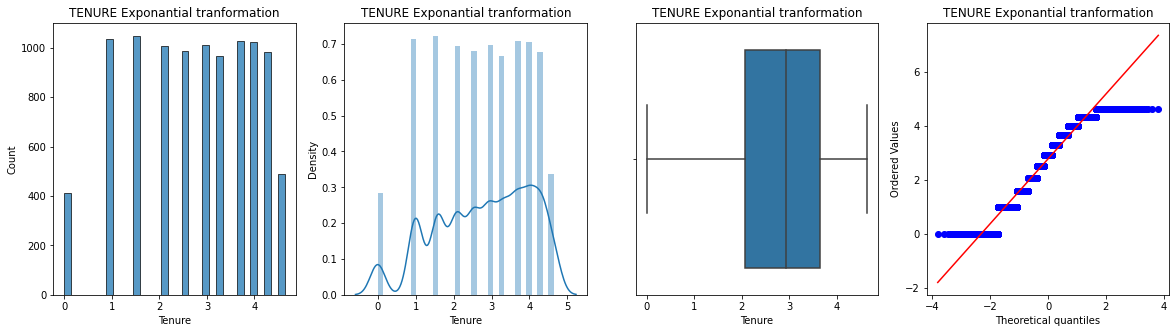

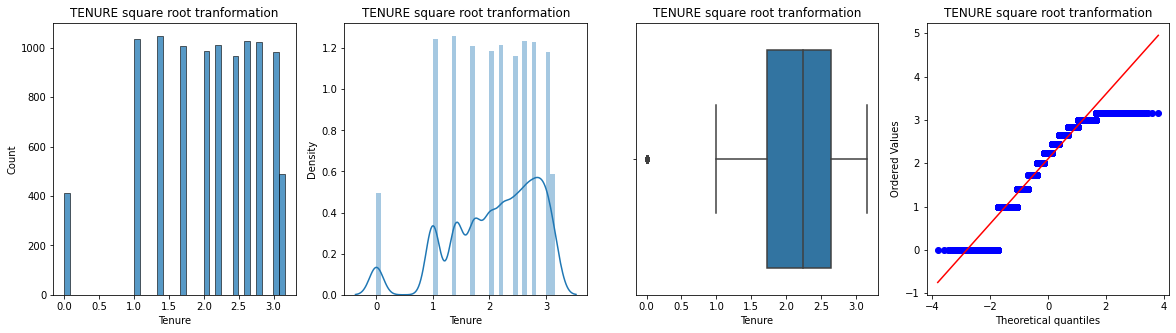

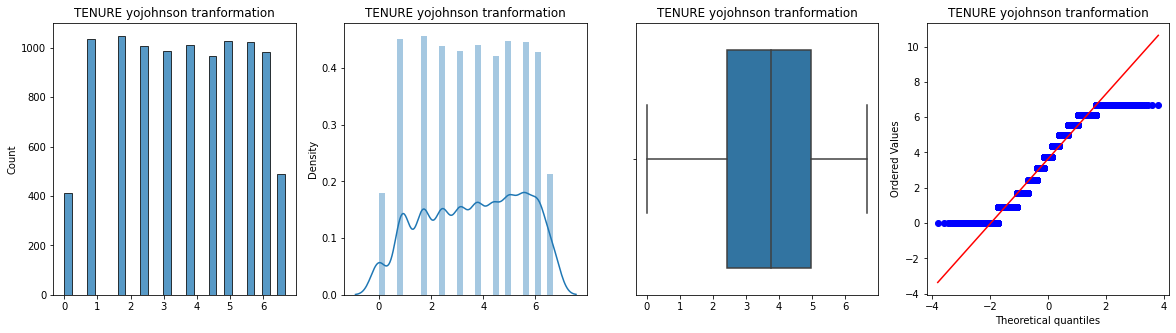

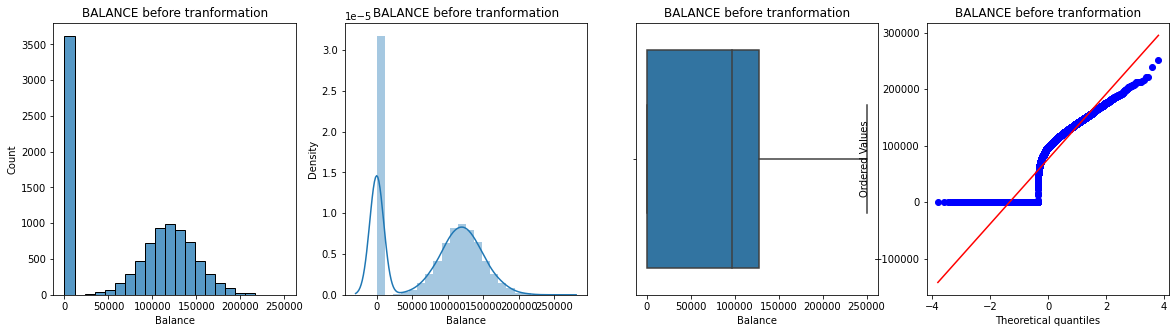

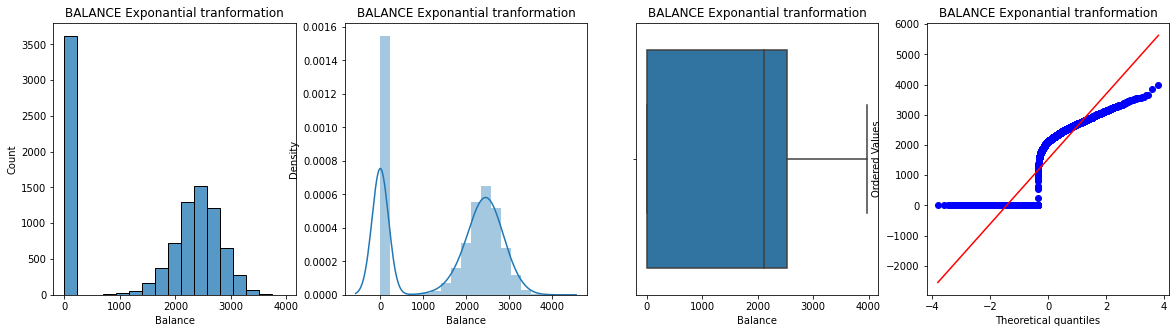

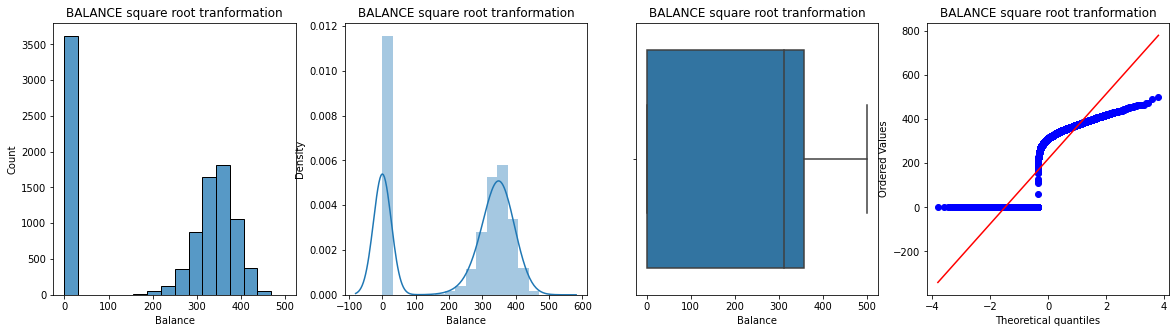

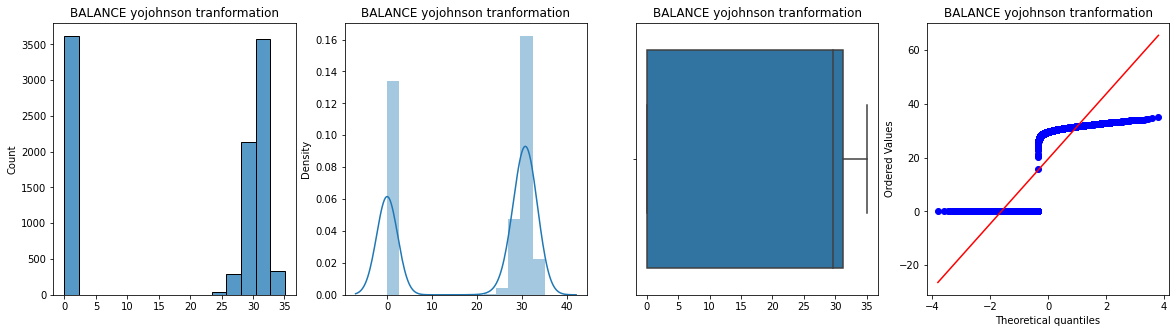

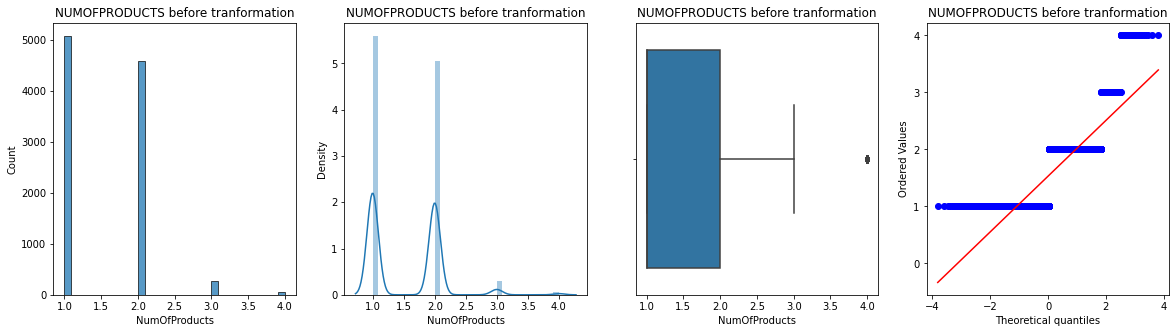

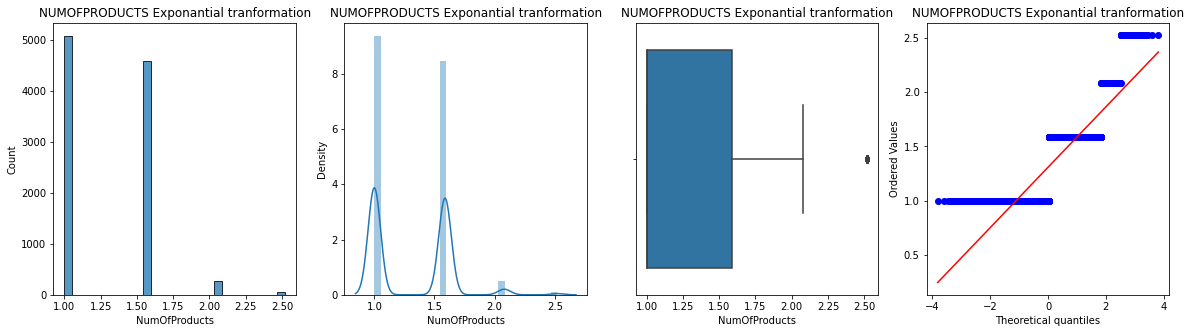

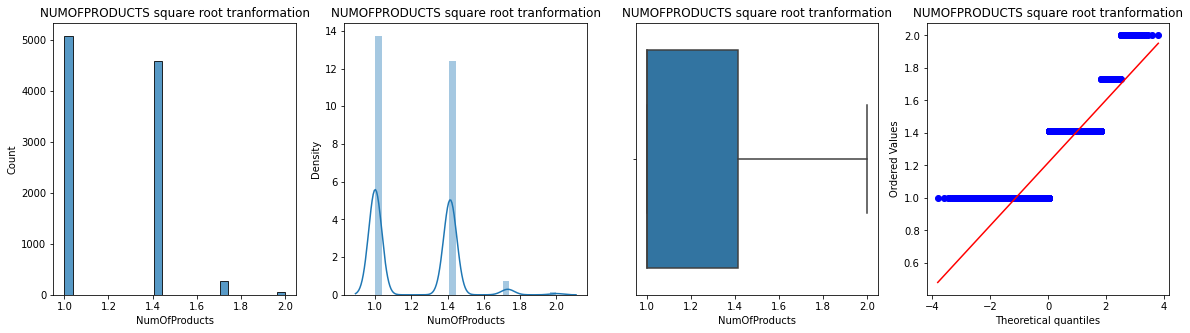

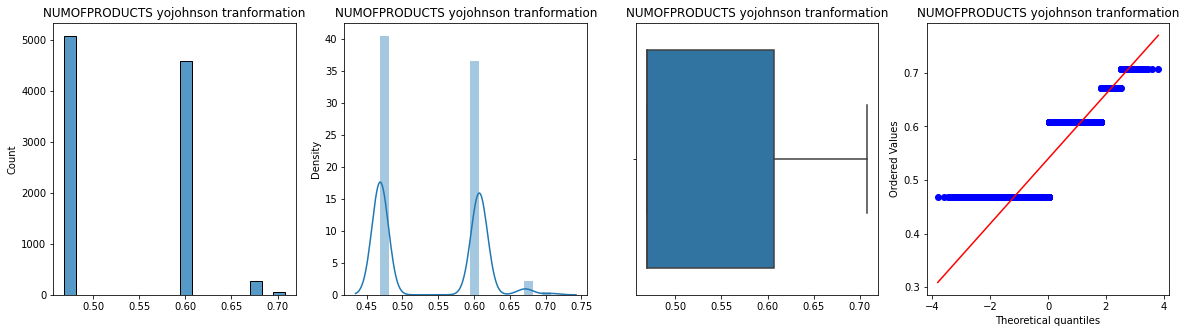

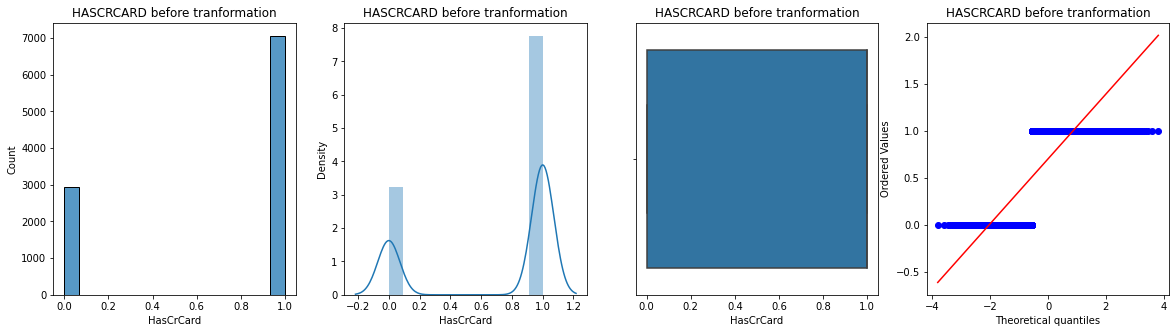

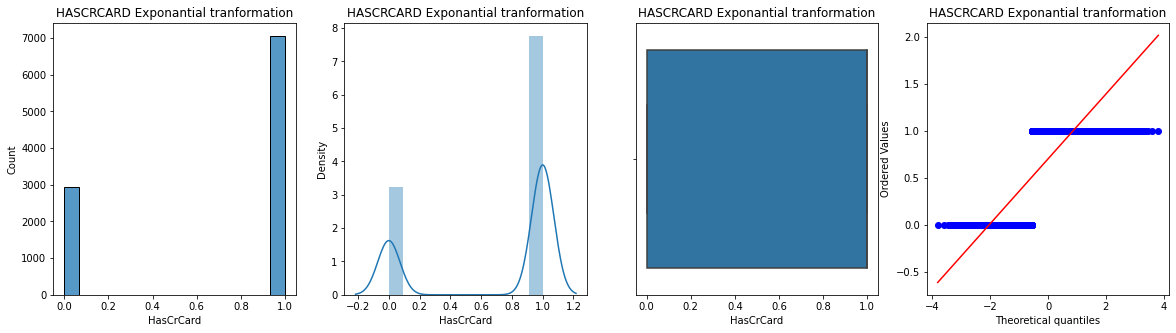

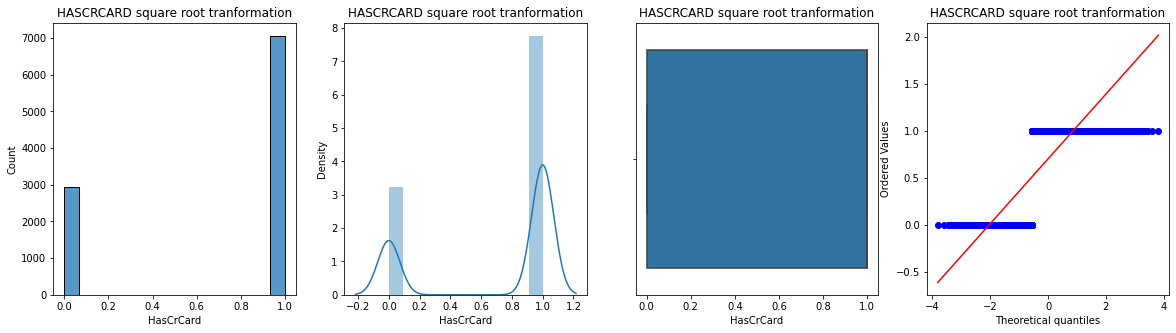

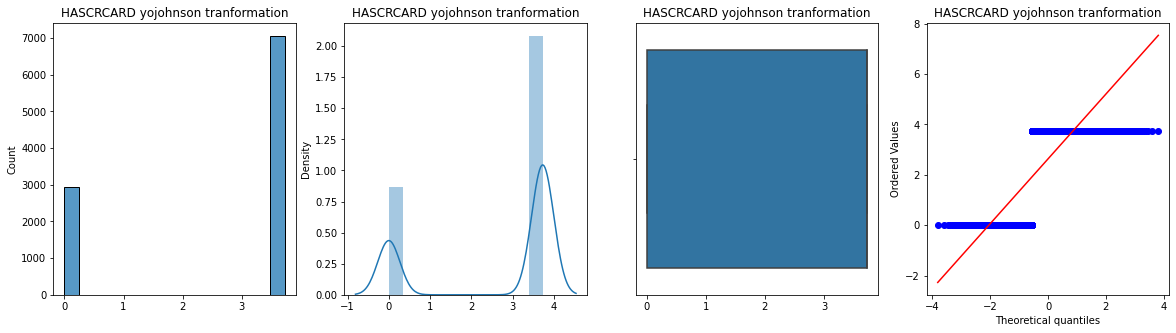

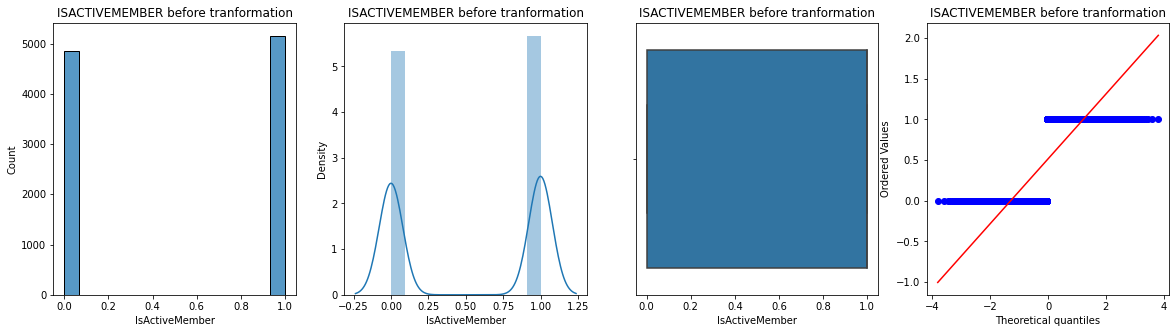

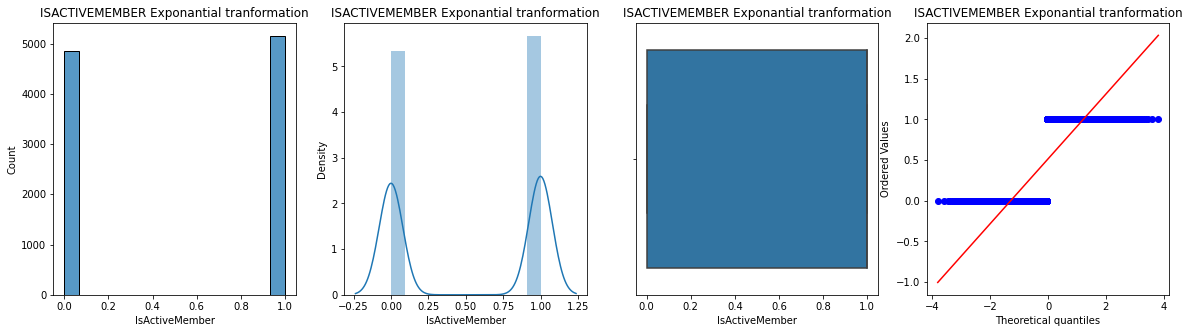

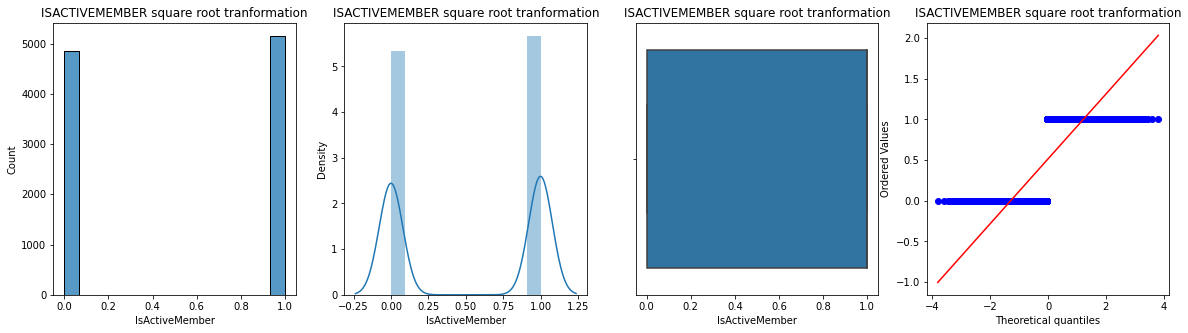

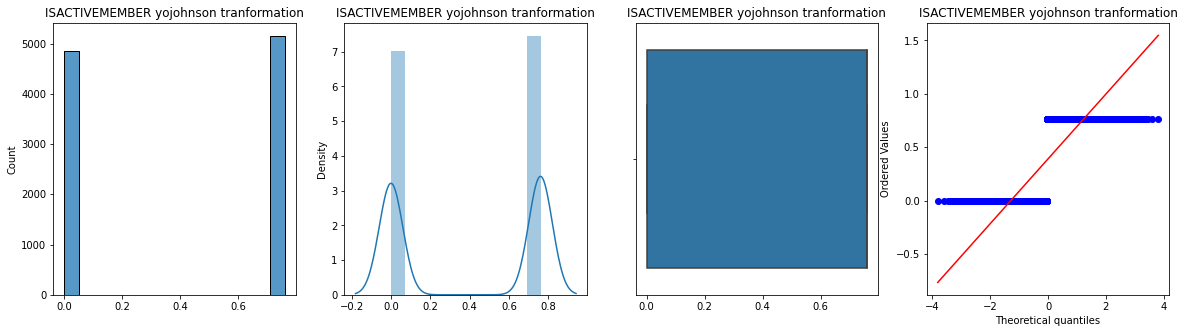

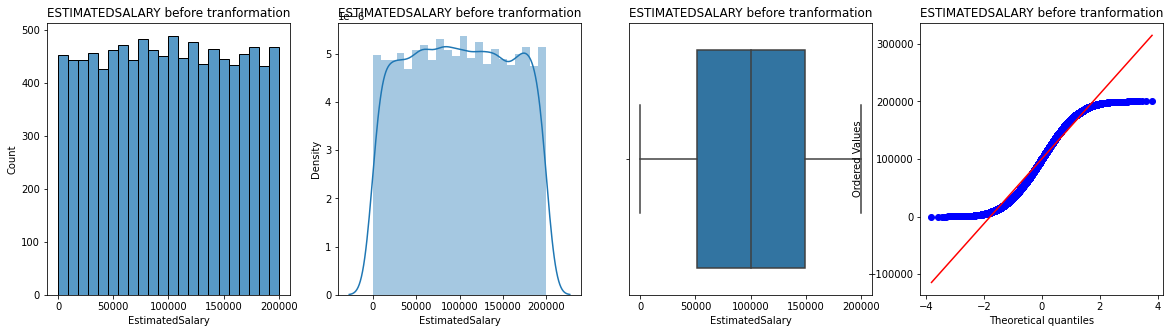

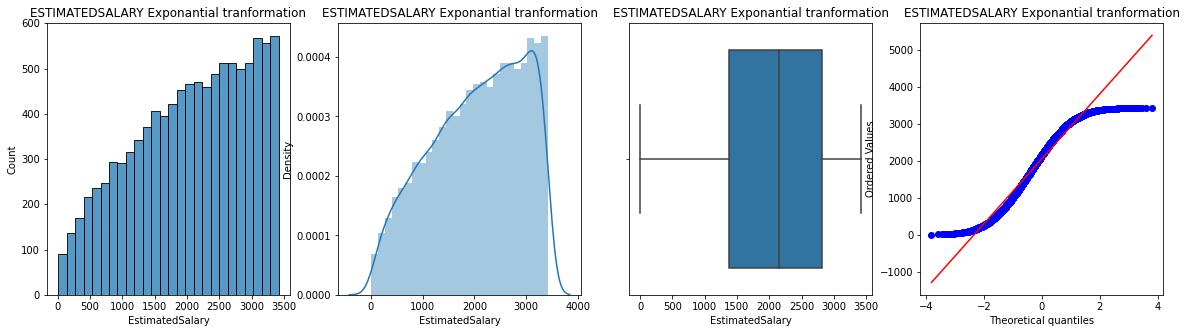

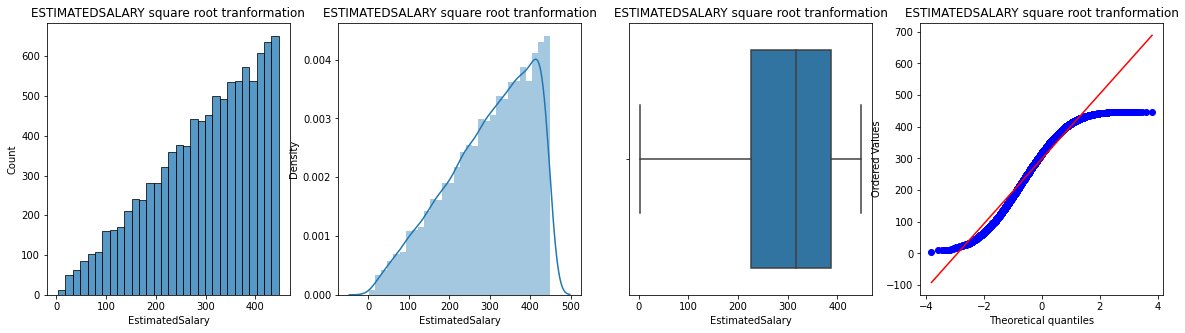

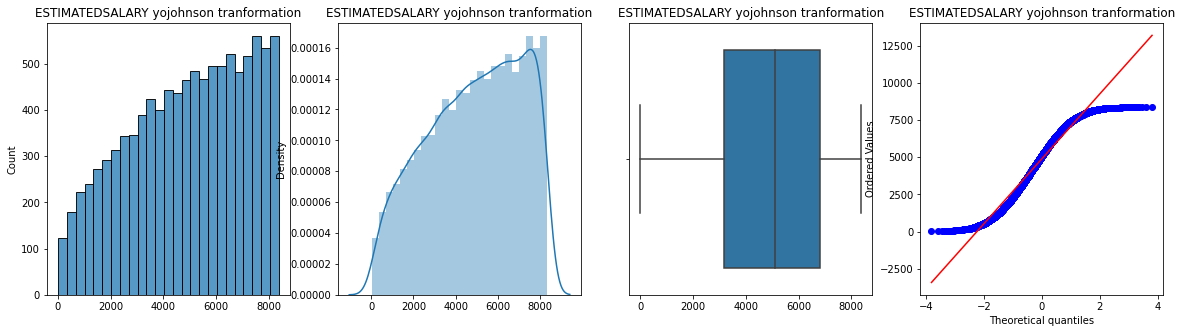

In [15]:
for feature in numericFeatures:
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot(df[feature], ax=ax[0]).set(title=f'{feature.upper()} before tranformation')
  sns.distplot(df[feature], ax=ax[1]).set(title=f'{feature.upper()} before tranformation')
  sns.boxplot(df[feature],ax=ax[2]).set(title=f'{feature.upper()} before tranformation')
  stats.probplot(df[feature], dist="norm", plot=plt)
  plt.title(f'{feature.upper()} before tranformation')
  fig.show()


  print(df[feature].var(),np.var((df[feature])**(1/1.5)),'Exponantial variance')
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot((df[feature])**(1/1.5), ax=ax[0]).set(title=f'{feature.upper()} Exponantial tranformation')
  sns.distplot((df[feature])**(1/1.5), ax=ax[1]).set(title=f'{feature.upper()} Exponantial tranformation')
  sns.boxplot((df[feature])**(1/1.5),ax=ax[2]).set(title=f'{feature.upper()} Exponantial tranformation')
  stats.probplot((df[feature])**(1/1.5), dist="norm", plot=plt)
  plt.title(f'{feature.upper()} Exponantial tranformation')
  fig.show()


  print(df[feature].var(),np.var((df[feature])**(1/2)),'Square root variance')
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot((df[feature])**(1/2), ax=ax[0]).set(title=f'{feature.upper()} square root tranformation')
  sns.distplot((df[feature])**(1/2), ax=ax[1]).set(title=f'{feature.upper()} square root tranformation')
  sns.boxplot((df[feature])**(1/2),ax=ax[2]).set(title=f'{feature.upper()} square root tranformation')
  stats.probplot((df[feature])**(1/2), dist="norm", plot=plt)
  plt.title(f'{feature.upper()} square root tranformation')
  fig.show()

  data, param = stats.yeojohnson(df[feature]) 
  print(df[feature].var(),np.var(data),'yojohnson variance')
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot(data, ax=ax[0]).set(title=f'{feature.upper()} yojohnson tranformation')
  sns.distplot(data, ax=ax[1]).set(title=f'{feature.upper()} yojohnson tranformation')
  sns.boxplot(data,ax=ax[2]).set(title=f'{feature.upper()} yojohnson tranformation')
  stats.probplot(data, dist="norm", plot=plt)
  plt.title(f'{feature.upper()} yojohnson tranformation')
  fig.show()

In [16]:
df_testing = df.copy()

In [17]:
def diagnostic_plots(df, feature,stage):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.kdeplot(df[feature])
    plt.title(f'dist {stage}')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.ylabel(f'{feature} {stage} quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[feature])
    plt.title(f'{stage} Boxplot')

    plt.show()

In [18]:

# This function find the inter quantile range find the upper bound and lower bound

def handlingOuliersIQR(feature):
    diagnostic_plots(df,feature,'before')
    
    # Finding the IQR
    percentile25 = df[feature].quantile(0.25)
    percentile75 = df[feature].quantile(0.75)
    
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    print(f"Upper limit of {feature}",upper_limit)
    print(f"Lower limit of {feature}",lower_limit)
    
    df_testing[feature]= np.where(df_testing[feature] > upper_limit, upper_limit,
                       np.where(df_testing[feature] < lower_limit, lower_limit, df[feature]))
    
    diagnostic_plots(df_testing,feature,'after')

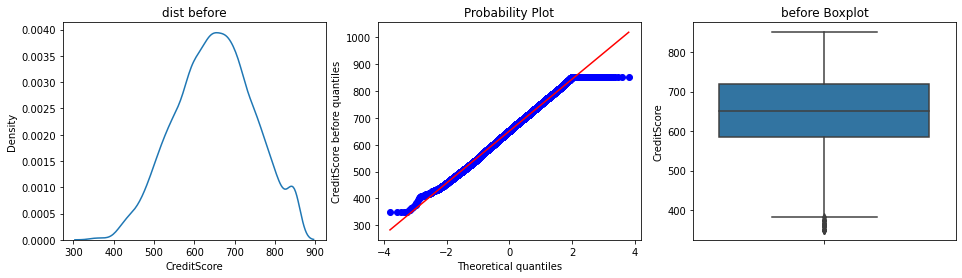

Upper limit of CreditScore 919.0
Lower limit of CreditScore 383.0


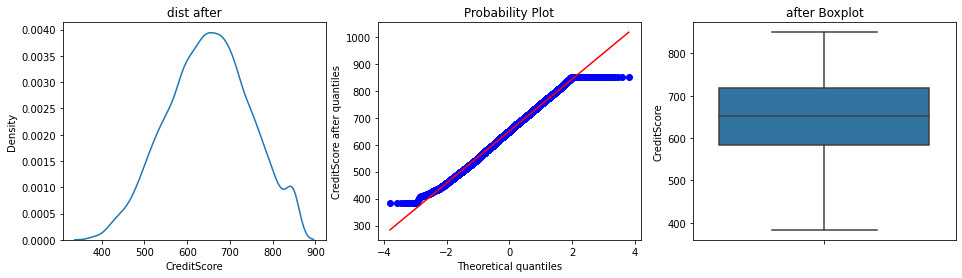

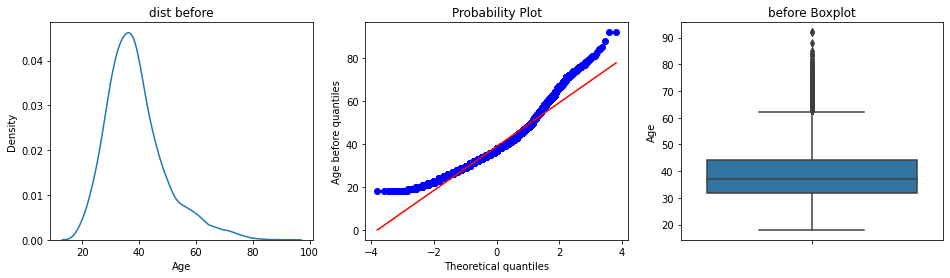

Upper limit of Age 62.0
Lower limit of Age 14.0


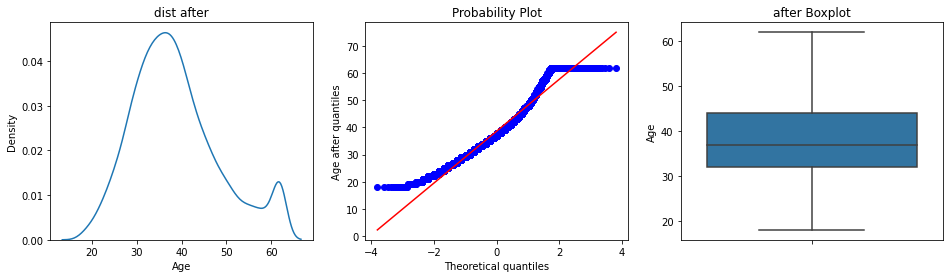

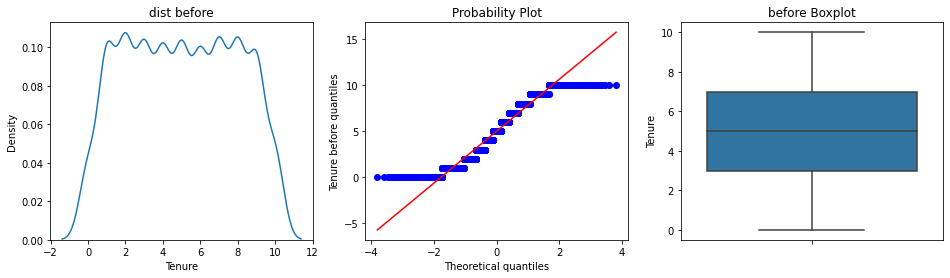

Upper limit of Tenure 13.0
Lower limit of Tenure -3.0


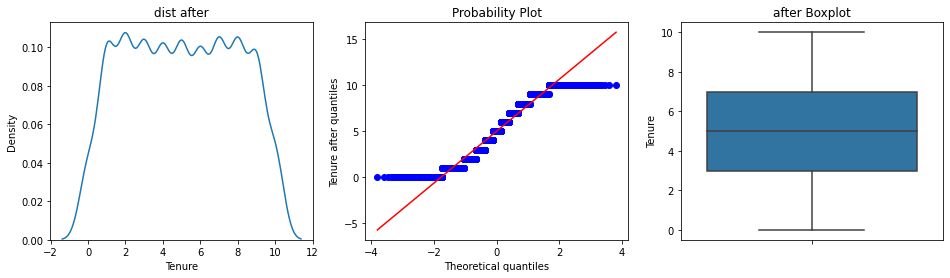

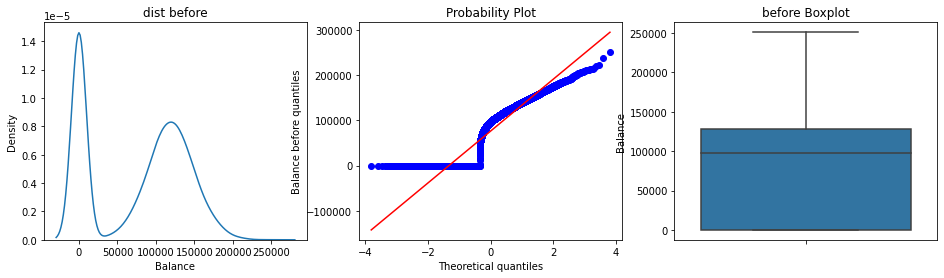

Upper limit of Balance 319110.60000000003
Lower limit of Balance -191466.36000000002


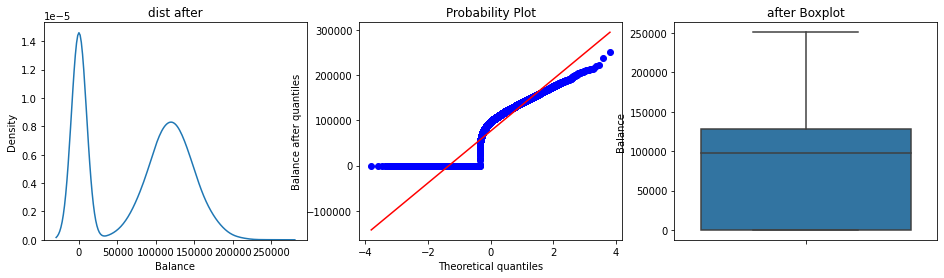

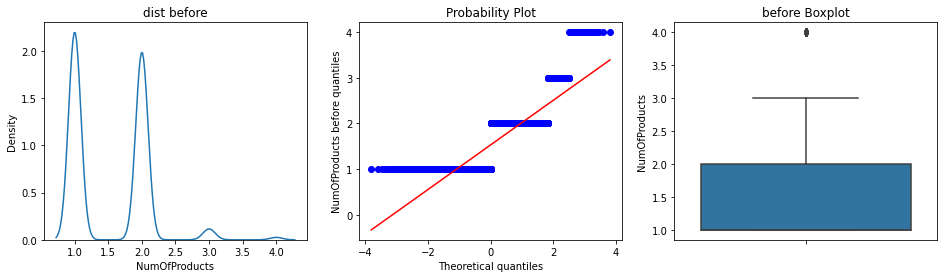

Upper limit of NumOfProducts 3.5
Lower limit of NumOfProducts -0.5


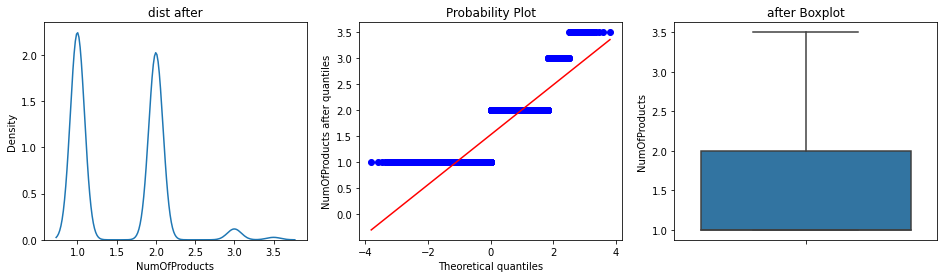

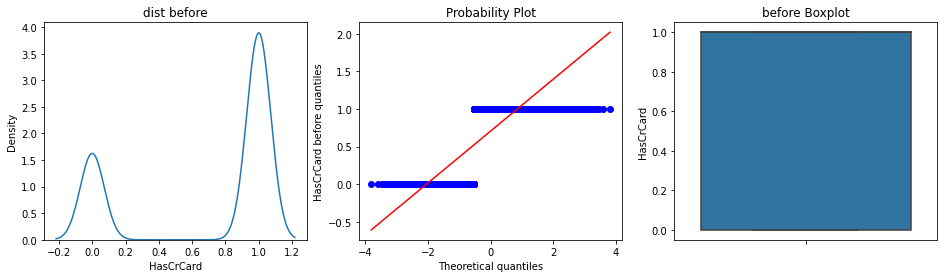

Upper limit of HasCrCard 2.5
Lower limit of HasCrCard -1.5


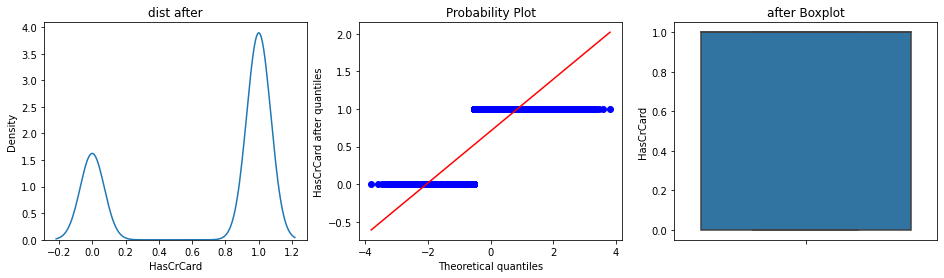

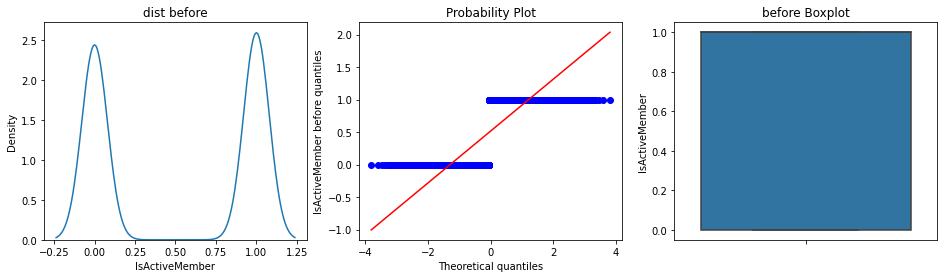

Upper limit of IsActiveMember 2.5
Lower limit of IsActiveMember -1.5


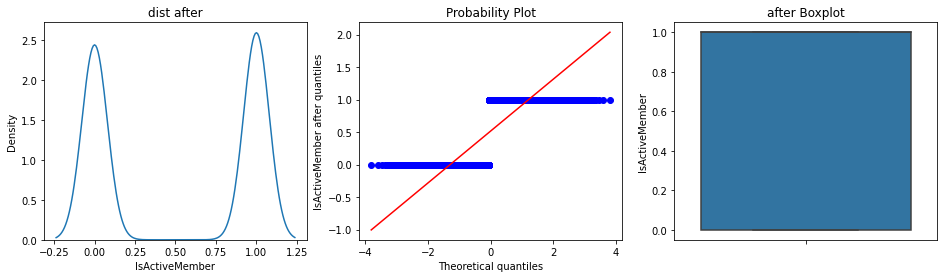

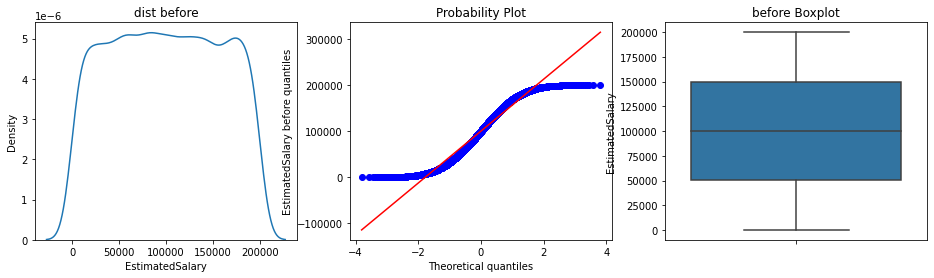

Upper limit of EstimatedSalary 296967.45375
Lower limit of EstimatedSalary -96577.09624999999


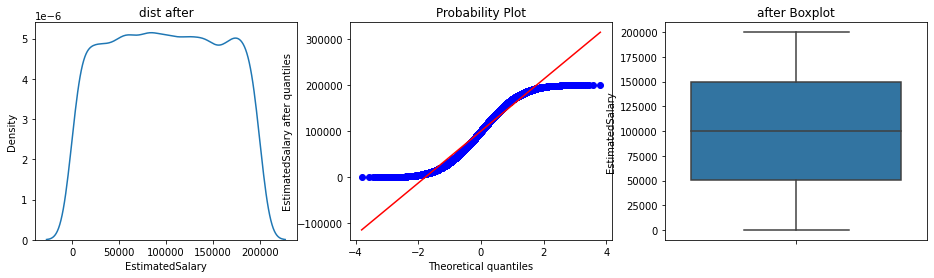

In [19]:
for feature in numericFeatures:
    handlingOuliersIQR(feature)  

### Feature Engineering

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(target,axis=1), df[target], test_size=0.33, random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6700, 10), (3300, 10), (6700,), (3300,))

##### Handling Skewed Data

In [23]:
pt = PowerTransformer()
pt = pt.fit(X_train[['CreditScore','Age','Tenure']])

In [24]:
X_train[['CreditScore','Age','Tenure']] = pt.transform(X_train[['CreditScore','Age','Tenure']])
X_test[['CreditScore','Age','Tenure']] = pt.transform(X_test[['CreditScore','Age','Tenure']])

##### Handling Outliers

In [25]:
for feature in ['CreditScore','Age']:    
    # Finding the IQR
    percentile25 = X_train[feature].quantile(0.25)
    percentile75 = X_train[feature].quantile(0.75)
    
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    print(f"Upper limit of {feature}",upper_limit)
    print(f"Lower limit of {feature}",lower_limit)
    
    X_train[feature]= np.where(X_train[feature] > upper_limit, upper_limit,
                       np.where(X_train[feature] < lower_limit, lower_limit, X_train[feature]))
    X_test[feature]= np.where(X_test[feature] > upper_limit, upper_limit,
                       np.where(X_test[feature] < lower_limit, lower_limit, X_test[feature]))

Upper limit of CreditScore 2.787849246009069
Lower limit of CreditScore -2.7942589864902985
Upper limit of Age 2.4718247362298835
Lower limit of Age -2.4519716667804317


In [26]:
X_train = pd.get_dummies(X_train,columns=categoricalFeatures)
X_test = pd.get_dummies(X_test,columns=categoricalFeatures)

##### Handling Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled[0].shape

(13,)

##### Model Building

In [29]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [30]:
model = Sequential()

model.add(Dense(5,activation='sigmoid',input_dim=13))
model.add(Dense(3,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 70        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 92
Trainable params: 92
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
history = model.fit(X_train,y_train,batch_size=100,epochs=400,validation_split=0.2,verbose=0)

In [45]:
y_pred = model.predict(X_test_scaled)

104/104 [==============================] - 0s 1ms/step


In [46]:
y_pred = y_pred.argmax(axis=-1)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.8051515151515152

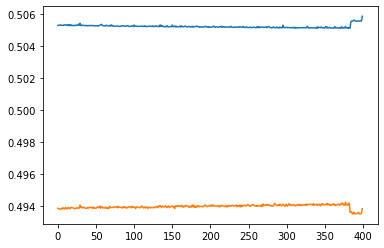

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

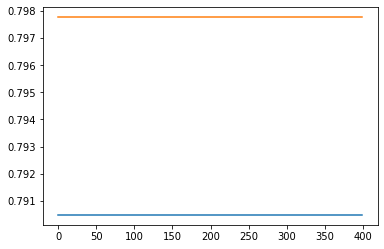

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

#### Early Stopping

In [50]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [52]:
history = model.fit(X_train, y_train, epochs=400,validation_split=0.2, callbacks=callback,verbose=0)

Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


In [53]:
y_pred = model.predict(X_test_scaled)

104/104 [==============================] - 0s 1ms/step


In [54]:
y_pred = y_pred.argmax(axis=-1)

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.8051515151515152

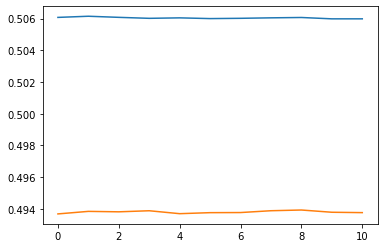

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

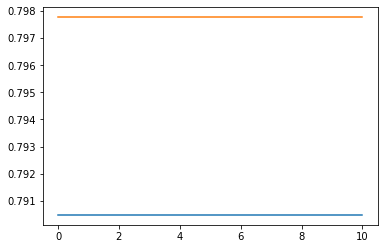

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])